In [78]:
# pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [122]:
happiness = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness_ref = pd.read_csv("Resources/2019_global_happiness_reference.csv")
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [124]:
happiness_ref

,Variable,Description
0,country,Name of the country.
1,year,"Survey year, ranging from 2005-2018."
2,happiness,A happiness ranking on a scale of 0 to 10.
3,wealth,"Log GDP per capita, which indicates the wealth..."
4,support,A value that indicates how many people have fa...
5,health,Healthy life expectancy at birth.
6,freedom,Satisfaction with individual freedom to make l...
7,generosity,Measure of how likely people are to donate to ...
8,corruption,Measure of national corruption
9,positivity,"Average of measures for happiness, laugh and ..."


In [80]:
happiness.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [81]:
happiness.shape

(2336, 13)

In [82]:
# Summary stats
print(happiness.describe())

              Year  Life Ladder  Log GDP Per Capita  Social Support  \
count  2336.000000  2336.000000         2316.000000     2323.000000   
mean   2014.679795     5.482778            9.393317        0.809995   
std       5.027398     1.126222            1.156462        0.121457   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2011.000000     4.646820            8.502017        0.744791   
50%    2015.000000     5.439057            9.502519        0.835509   
75%    2019.000000     6.314347           10.380333        0.904686   
max    2023.000000     8.018934           11.663788        0.987343   

       Healthy Life Expectancy At Birth  Freedom To Make Life Choices  \
count                       2281.000000                   2303.000000   
mean                          63.394335                      0.750210   
std                            6.848311                      0.138948   
min                            6.720000                      0.25753

In [83]:
# Selecting only our numeric columns 
numeric_cols = happiness.select_dtypes(include=[np.number]).columns.drop('Year')

In [84]:
# Group by 'Regional Indicator' and calculate means for numeric columns only
grouped_means = happiness.groupby('Regional Indicator')[numeric_cols].mean()

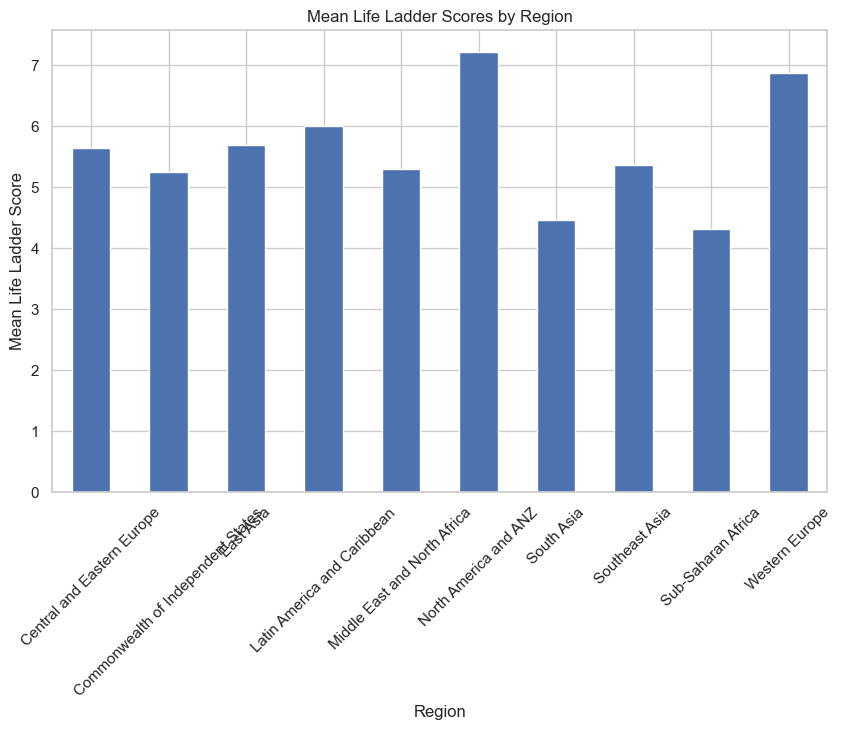

In [85]:
# Bar chart of Region Life Ladder means
grouped_means['Life Ladder'].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Life Ladder Scores by Region')
plt.xlabel('Region')
plt.ylabel('Mean Life Ladder Score')
plt.xticks(rotation=45)
plt.show()

In [86]:
check_null = happiness[numeric_cols].isna().any()
print(check_null)

Life Ladder                          False
Log GDP Per Capita                    True
Social Support                        True
Healthy Life Expectancy At Birth      True
Freedom To Make Life Choices          True
Generosity                            True
Perceptions Of Corruption             True
Positive Affect                       True
Negative Affect                       True
Confidence In National Government     True
dtype: bool


In [87]:
grouped_means.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Regional Indicator,,,,,,,,,,
Central and Eastern Europe,5.637699,10.006316,0.861519,67.074629,0.700022,-0.075257,0.869789,0.585758,0.263996,0.308995
Commonwealth of Independent States,5.249993,9.266064,0.832110,63.116705,0.718623,-0.091399,0.769348,0.567455,0.228137,0.515145
East Asia,5.687785,10.190187,0.852886,68.514770,0.751254,-0.028363,0.712765,0.636781,0.183525,0.361518
Latin America and Caribbean,6.000732,9.357455,0.849919,65.020693,0.786383,-0.036552,0.786339,0.760774,0.288888,0.390660
Middle East and North Africa,5.298651,9.647871,0.781279,64.789179,0.682048,-0.056793,0.748664,0.563915,0.334258,0.475724


# Life Ladder By Region

In [154]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Life Ladder'.
region_Life_ladder_mean = happiness.groupby(['Year', 'Regional Indicator'])['Life Ladder'].mean().unstack()

# Life Ladder mean for each Region in each year
region_Life_ladder_mean.head(15)

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,5.567262,NaN,6.515817,6.795683,5.676705,7.379368,5.224658,NaN,NaN,7.083090
2006,5.422188,4.834771,5.398228,5.581020,5.870536,7.243404,4.644593,5.147139,4.152997,6.881718
2007,5.152283,4.887174,5.369349,5.838044,5.604301,7.471001,4.893733,5.496605,4.457456,7.020117
2008,5.418225,5.125531,5.220759,5.797573,5.253147,7.350230,4.534499,5.309534,4.254407,7.165480
2009,5.180073,5.070795,5.336026,6.366542,5.498141,7.322928,4.723865,5.253169,4.304473,6.772409
2010,5.179333,4.930266,5.547067,6.179668,5.438400,7.371941,4.786475,5.452007,4.156947,6.756548
2011,5.276704,5.090279,5.843450,6.068258,5.317819,7.284362,4.451573,5.476238,4.446863,6.778830
2012,5.381173,5.235646,5.593542,6.098579,5.206785,7.221647,4.469489,5.166570,4.276048,6.793845
2013,5.377946,5.293665,5.682507,6.159445,5.263122,7.371850,4.461234,5.249503,4.028347,6.681949


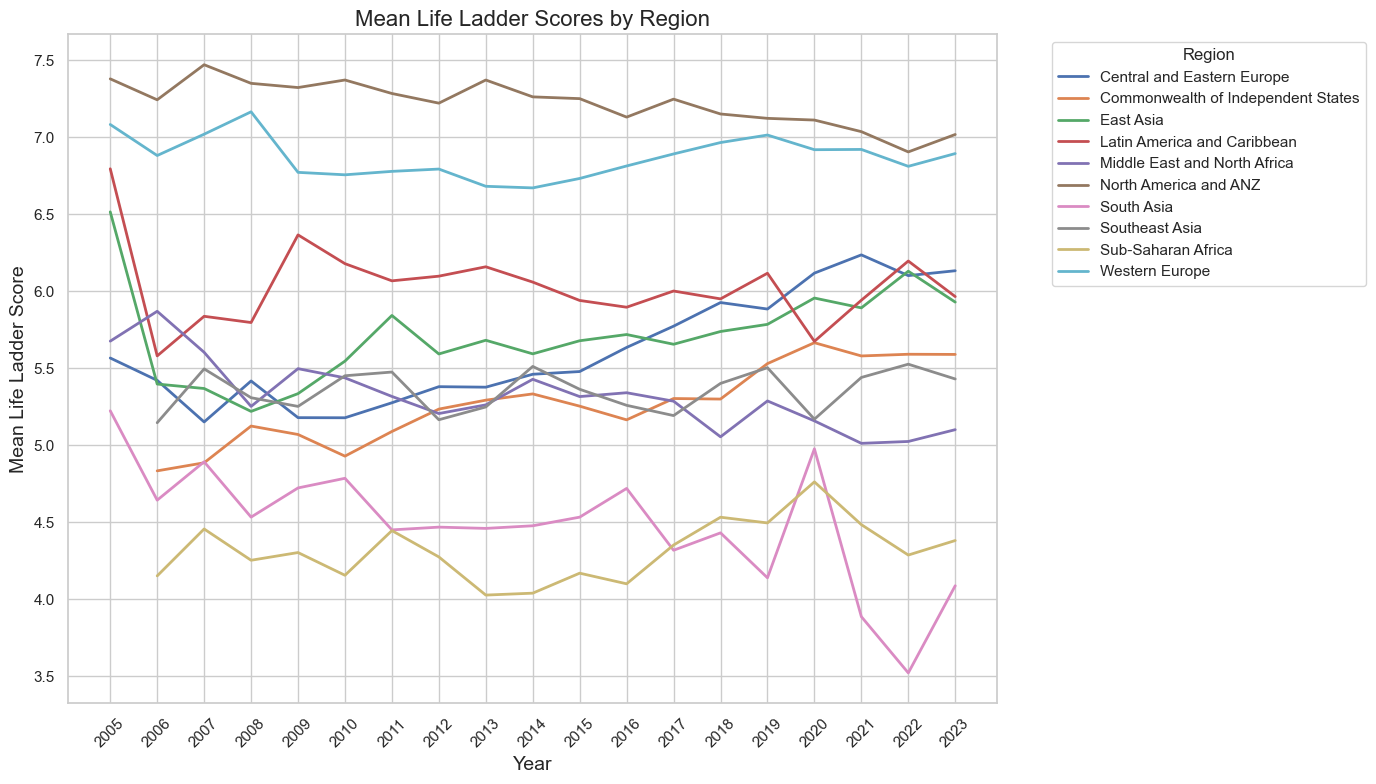

In [89]:
# Plotting
plt.figure(figsize=(14, 8))
for column in region_Life_ladder_mean.columns:
    plt.plot(region_Life_ladder_mean.index, region_Life_ladder_mean[column], marker='', linewidth=2, label=column)

plt.title('Mean Life Ladder Scores by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Life Ladder Score', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Setting x-ticks to be integer years
years_int = region_Life_ladder_mean.index.astype(int) 
plt.xticks(ticks=region_Life_ladder_mean.index, labels=years_int, rotation=45)

plt.tight_layout()
plt.show()


## Scatter Plot

C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


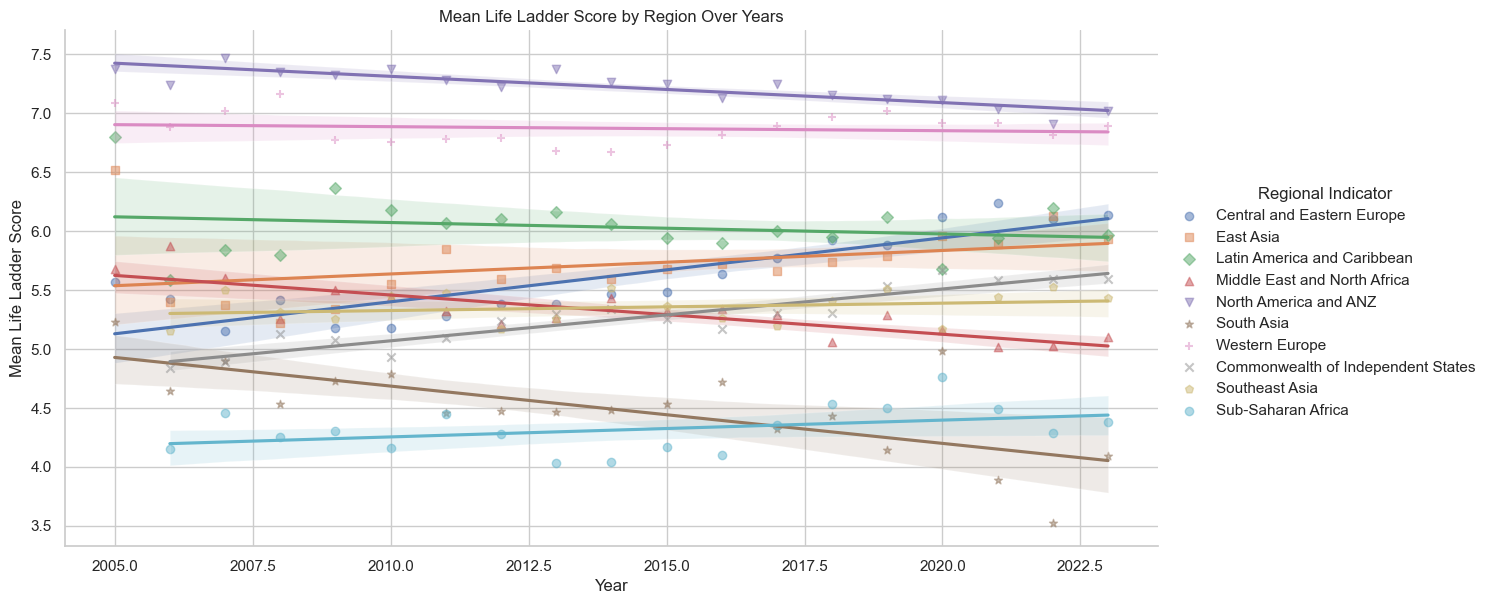

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_regions = long_format['Regional Indicator'].nunique()
markers = ['o', 's', 'D', '^', 'v', '*', '+', 'x', 'p'] * unique_regions 

markers = markers[:unique_regions]

sns.lmplot(data=long_format, x='Year', y='Life Ladder', hue='Regional Indicator',
           aspect=2, height=6, markers=markers, fit_reg=True, scatter_kws={'alpha':0.5})

plt.title('Mean Life Ladder Score by Region Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Life Ladder Score')
plt.show()

# Log GDP Per Capita By Region

In [91]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Log GDP Per Capita'.
region_gdp_mean = happiness.groupby(['Year', 'Regional Indicator'])['Log GDP Per Capita'].mean().unstack()

# Log GDP Per Capita mean for each Region in each year
region_gdp_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,10.000422,NaN,10.551915,9.514338,9.636317,10.684679,8.252209,NaN,NaN,10.681617
2006,10.147592,8.984661,10.088217,9.201553,10.159522,10.730797,8.190217,8.989898,7.773366,10.782709
2007,9.857430,9.153694,9.647472,9.290701,9.414250,10.730225,8.255328,9.100056,7.803574,10.738579
2008,9.868189,9.138152,10.029429,9.330602,9.343633,10.726804,8.131915,9.128016,7.755185,10.779126
2009,9.780750,9.096637,10.169075,9.328222,9.604397,10.789930,8.187384,9.235967,7.747828,10.745168


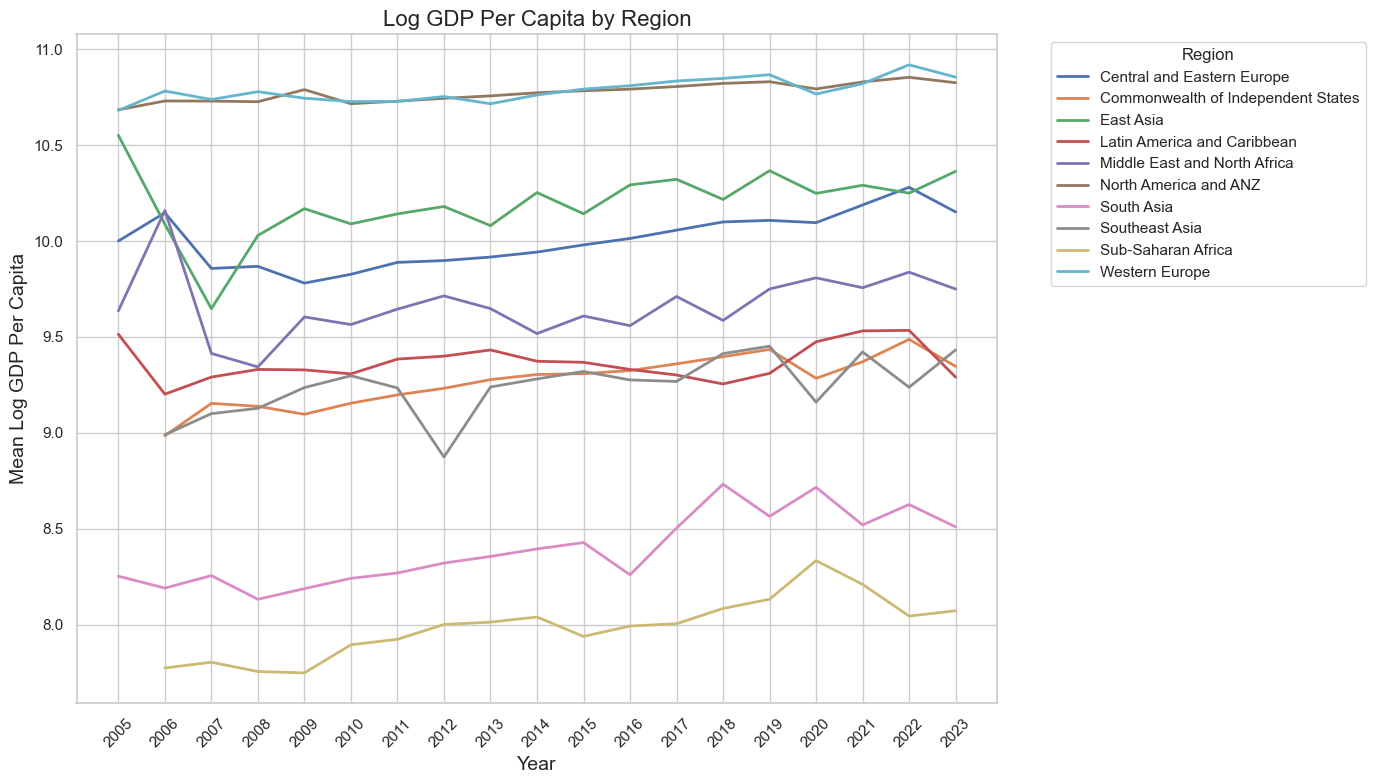

In [92]:
plt.figure(figsize=(14, 8))
for column in region_gdp_mean.columns:
    plt.plot(region_gdp_mean.index, region_gdp_mean[column], marker='', linewidth=2, label=column)

plt.title('Log GDP Per Capita by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Log GDP Per Capita', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_gdp_mean.index.min(), region_gdp_mean.index.max()+1, 1), 
           labels=np.arange(region_gdp_mean.index.min(), region_gdp_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Social Support By Region

In [93]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Social Support'.
region_social_support_mean = happiness.groupby(['Year', 'Regional Indicator'])['Social Support'].mean().unstack()

# Social Support mean for each Region in each year
region_social_support_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,0.901900,NaN,0.927712,0.913670,0.836311,0.964722,0.590946,NaN,NaN,0.941433
2006,0.922932,0.818482,0.804234,0.892091,0.884107,0.955310,0.779150,0.832032,0.736388,0.938155
2007,0.854293,0.784838,0.864192,0.850401,0.791608,0.965904,0.637417,0.813255,0.717888,0.923242
2008,0.889164,0.795034,0.829924,0.846860,0.726805,0.945551,0.601180,0.773026,0.657791,0.936814
2009,0.838718,0.810719,0.833002,0.861387,0.852498,0.927319,0.649567,0.819856,0.721971,0.909614


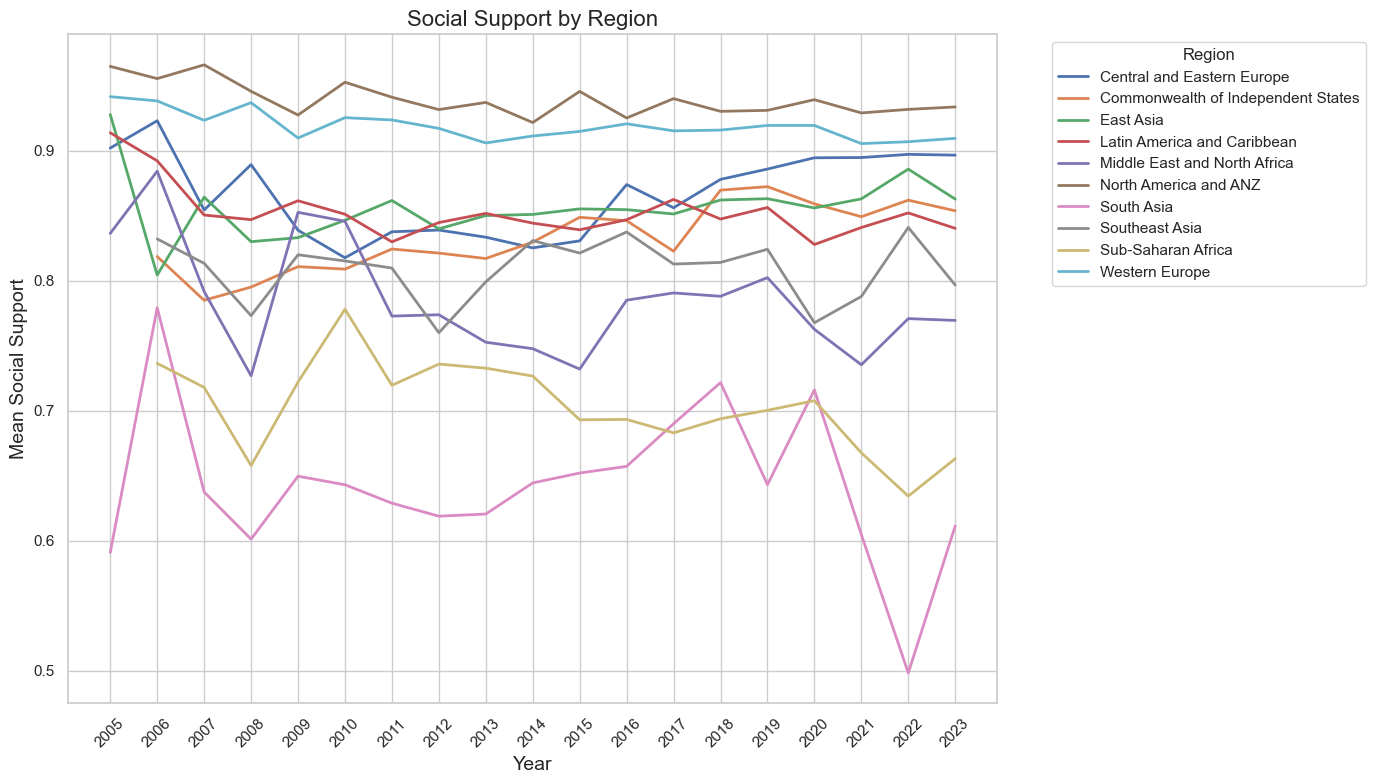

In [94]:
plt.figure(figsize=(14, 8))
for column in region_social_support_mean.columns:
    plt.plot(region_social_support_mean.index, region_social_support_mean[column], marker='', linewidth=2, label=column)

plt.title('Social Support by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Social Support', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_social_support_mean.index.min(), region_social_support_mean.index.max()+1, 1), 
           labels=np.arange(region_social_support_mean.index.min(), region_social_support_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Healthy Life Expectancy At Birth By Region

In [95]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Healthy Life Expectancy At Birth'.
region_life_expectancy_mean = happiness.groupby(['Year', 'Regional Indicator'])['Healthy Life Expectancy At Birth'].mean().unstack()

# Social Support mean for each Region in each year
region_life_expectancy_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,65.699999,NaN,72.400002,64.333333,63.983334,70.150002,53.200001,NaN,NaN,69.870000
2006,65.312000,60.607273,68.120000,62.211000,66.256001,68.250000,59.230000,62.291429,49.926087,69.712502
2007,65.615714,60.878000,66.334999,64.978889,64.007188,69.270000,58.412000,62.992500,49.555238,69.964445
2008,64.646666,61.276364,67.100000,62.623000,63.886818,69.305000,57.373334,63.182499,50.740800,70.014667
2009,66.118462,61.458333,70.000000,65.243333,63.710147,68.730000,57.703334,64.280000,51.297000,70.387692


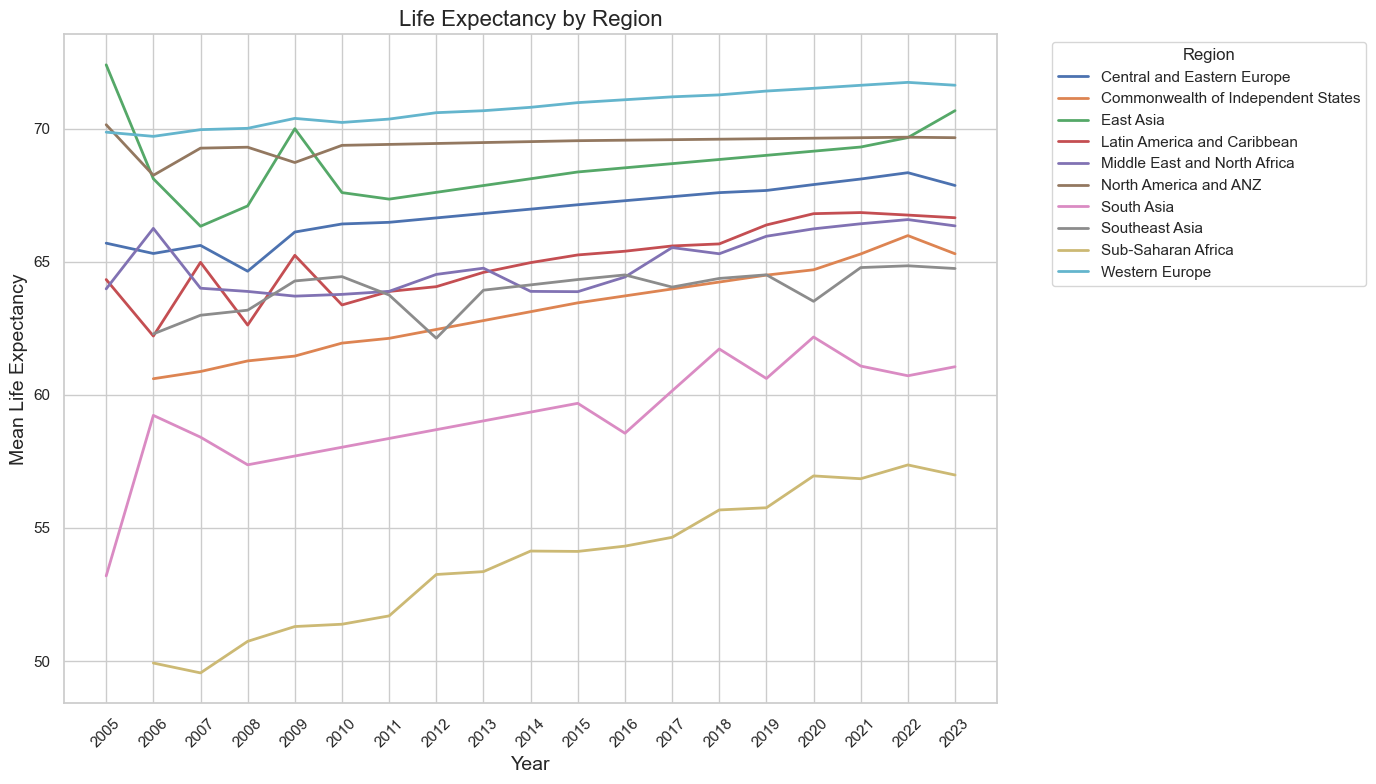

In [96]:
plt.figure(figsize=(14, 8))
for column in region_life_expectancy_mean.columns:
    plt.plot(region_life_expectancy_mean.index, region_life_expectancy_mean[column], marker='', linewidth=2, label=column)

plt.title('Life Expectancy by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Life Expectancy', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_life_expectancy_mean.index.min(), region_life_expectancy_mean.index.max()+1, 1), 
           labels=np.arange(region_life_expectancy_mean.index.min(), region_life_expectancy_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Freedom To Make Life Choices By Region

In [107]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Freedom To Make Life Choices'.
region_freedom_mean = happiness.groupby(['Year', 'Regional Indicator'])['Freedom To Make Life Choices'].mean().unstack()

# Social Support mean for each Region in each year
region_freedom_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,0.786176,NaN,0.867779,0.844710,0.698713,0.946140,0.629996,NaN,NaN,0.887671
2006,0.686988,0.660660,0.751657,0.718034,0.739996,0.921788,0.699636,0.824326,0.680855,0.904877
2007,0.578743,0.634934,0.744405,0.725190,0.573750,0.892786,0.575649,0.829821,0.671680,0.813315
2008,0.631166,0.652725,0.699471,0.711303,0.545922,0.903269,0.644438,0.806693,0.589569,0.838194
2009,0.546456,0.604163,0.754806,0.730870,0.685662,0.872871,0.631866,0.849670,0.644635,0.800509


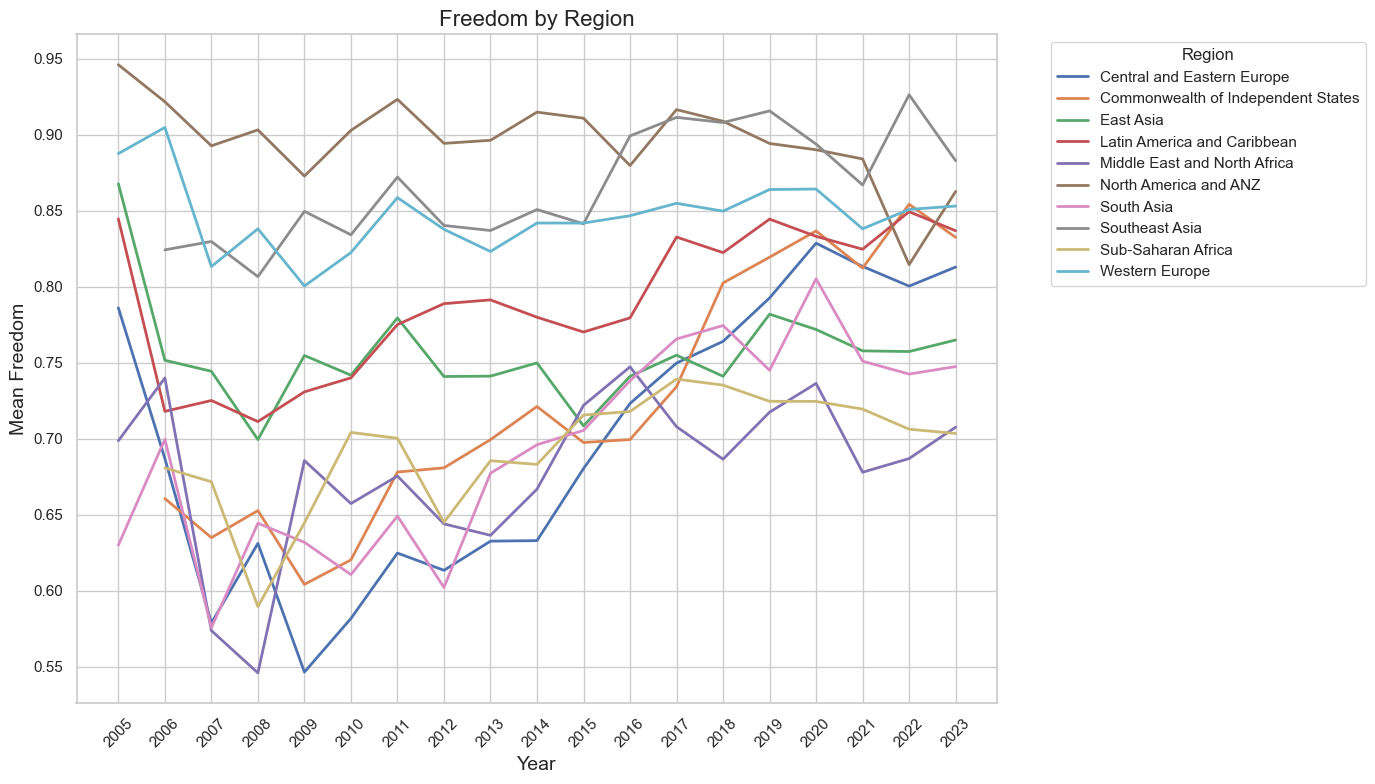

In [98]:
plt.figure(figsize=(14, 8))
for column in region_freedom_mean.columns:
    plt.plot(region_freedom_mean.index, region_freedom_mean[column], marker='', linewidth=2, label=column)

plt.title('Freedom by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Freedom', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_freedom_mean.index.min(), region_freedom_mean.index.max()+1, 1), 
           labels=np.arange(region_freedom_mean.index.min(), region_freedom_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Generosity By Region

In [108]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Generosity'.
region_generosity_mean = happiness.groupby(['Year', 'Regional Indicator'])['Generosity'].mean().unstack()

# Life Ladder mean for each Region in each year
region_generosity_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,0.248033,NaN,NaN,NaN,NaN
2006,-0.162401,-0.214724,0.020772,0.021557,-0.072325,0.306320,0.056216,0.203866,0.017679,0.108416
2007,-0.118053,-0.202738,-0.069073,0.021487,-0.027409,0.263834,0.093775,0.213968,0.020181,0.121956
2008,-0.148831,-0.152612,-0.000855,-0.004540,-0.009469,0.275570,0.094865,0.173814,-0.011826,0.115854
2009,-0.113776,-0.156313,-0.043720,-0.020009,-0.019562,0.219311,0.080024,0.099104,-0.001020,0.131898


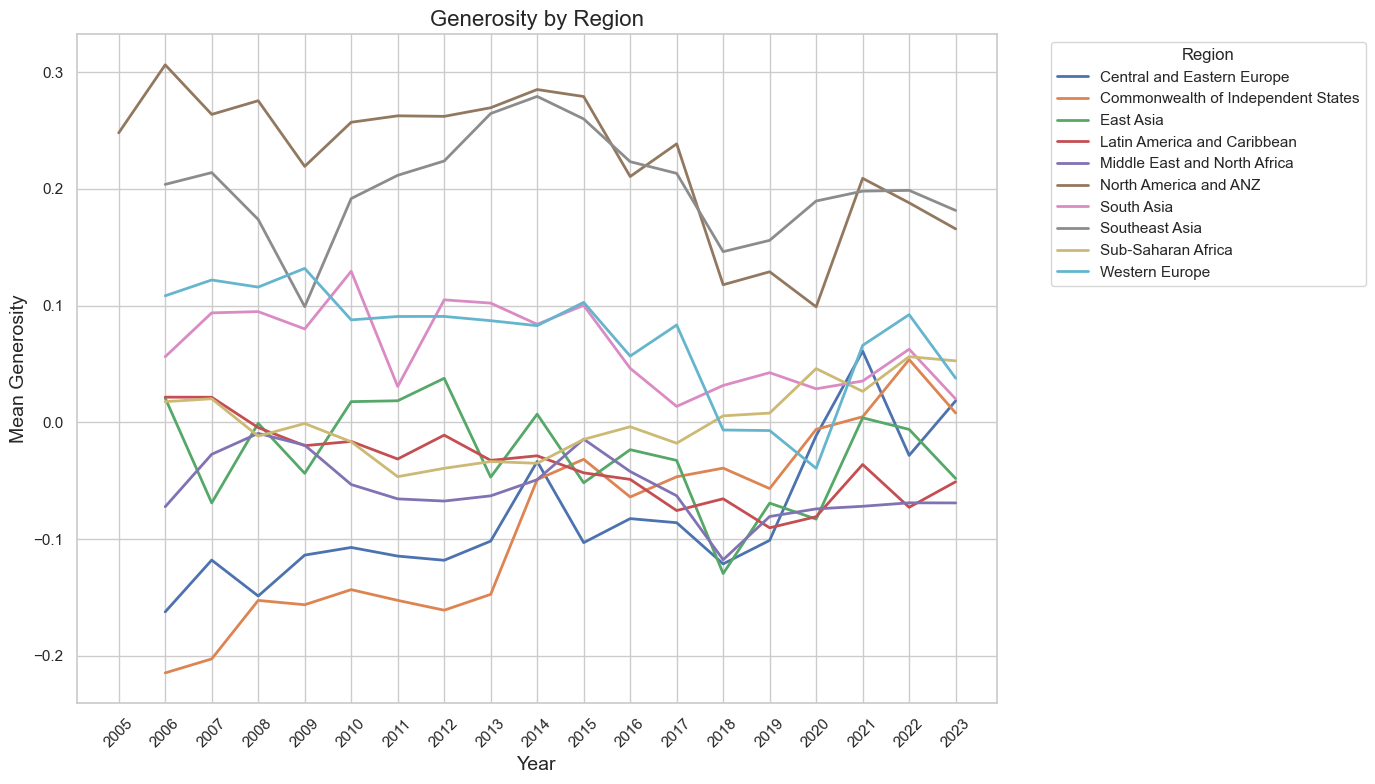

In [100]:
plt.figure(figsize=(14, 8))
for column in region_generosity_mean.columns:
    plt.plot(region_generosity_mean.index, region_generosity_mean[column], marker='', linewidth=2, label=column)

plt.title('Generosity by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Generosity', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_generosity_mean.index.min(), region_generosity_mean.index.max()+1, 1), 
           labels=np.arange(region_generosity_mean.index.min(), region_generosity_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Perceptions Of Corruption by Region

In [101]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Perceptions Of Corruption by Region'.
region_corruption_mean = happiness.groupby(['Year', 'Regional Indicator'])['Perceptions Of Corruption'].mean().unstack()

# Life Ladder mean for each Region in each year
region_corruption_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,0.935840,NaN,0.698930,0.743014,0.726708,0.446549,0.844436,NaN,NaN,0.650498
2006,0.870836,0.817728,0.666817,0.801532,0.639335,0.412264,0.843912,0.802642,0.787860,0.524034
2007,0.901647,0.836427,0.843266,0.810085,0.809405,0.461460,0.839917,0.726630,0.819730,0.611403
2008,0.849750,0.810982,0.721585,0.800638,0.775365,0.450661,0.863967,0.747844,0.851521,0.579777
2009,0.906335,0.802685,0.599910,0.784694,0.674717,0.539008,0.838988,0.759326,0.825859,0.600202


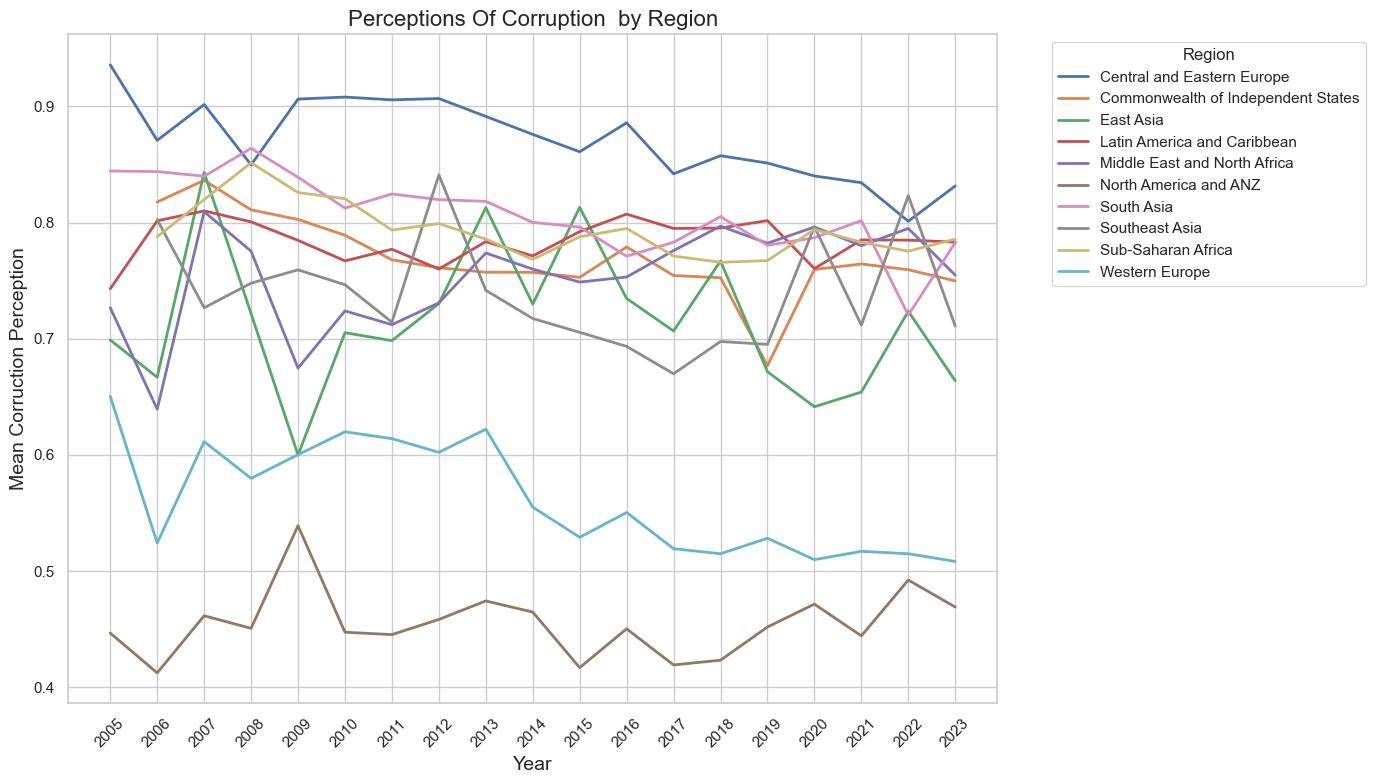

In [102]:
plt.figure(figsize=(14, 8))
for column in region_corruption_mean.columns:
    plt.plot(region_corruption_mean.index, region_corruption_mean[column], marker='', linewidth=2, label=column)

plt.title('Perceptions Of Corruption  by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Corruction Perception', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_corruption_mean.index.min(), region_corruption_mean.index.max()+1, 1), 
           labels=np.arange(region_corruption_mean.index.min(), region_corruption_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Positive Affect By Region

In [134]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Positive Affect by Region'.
region_positive_mean = happiness.groupby(['Year', 'Regional Indicator'])['Positive Affect'].mean().unstack()

# Life Ladder mean for each Region in each year
region_positive_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,0.600993,NaN,0.685982,0.778712,0.591783,0.776535,NaN,NaN,NaN,0.694042
2006,0.587992,0.522585,0.619162,0.750502,0.622784,0.799768,0.563965,0.715764,0.648300,0.724748
2007,0.570070,0.517076,0.610616,0.764000,0.592111,0.783297,0.540208,0.712432,0.671527,0.700523
2008,0.557046,0.544061,0.622449,0.749137,0.581762,0.772409,0.551524,0.691518,0.630680,0.712054
2009,0.546291,0.543683,0.646141,0.775140,0.597859,0.772989,0.547742,0.675654,0.657444,0.701986


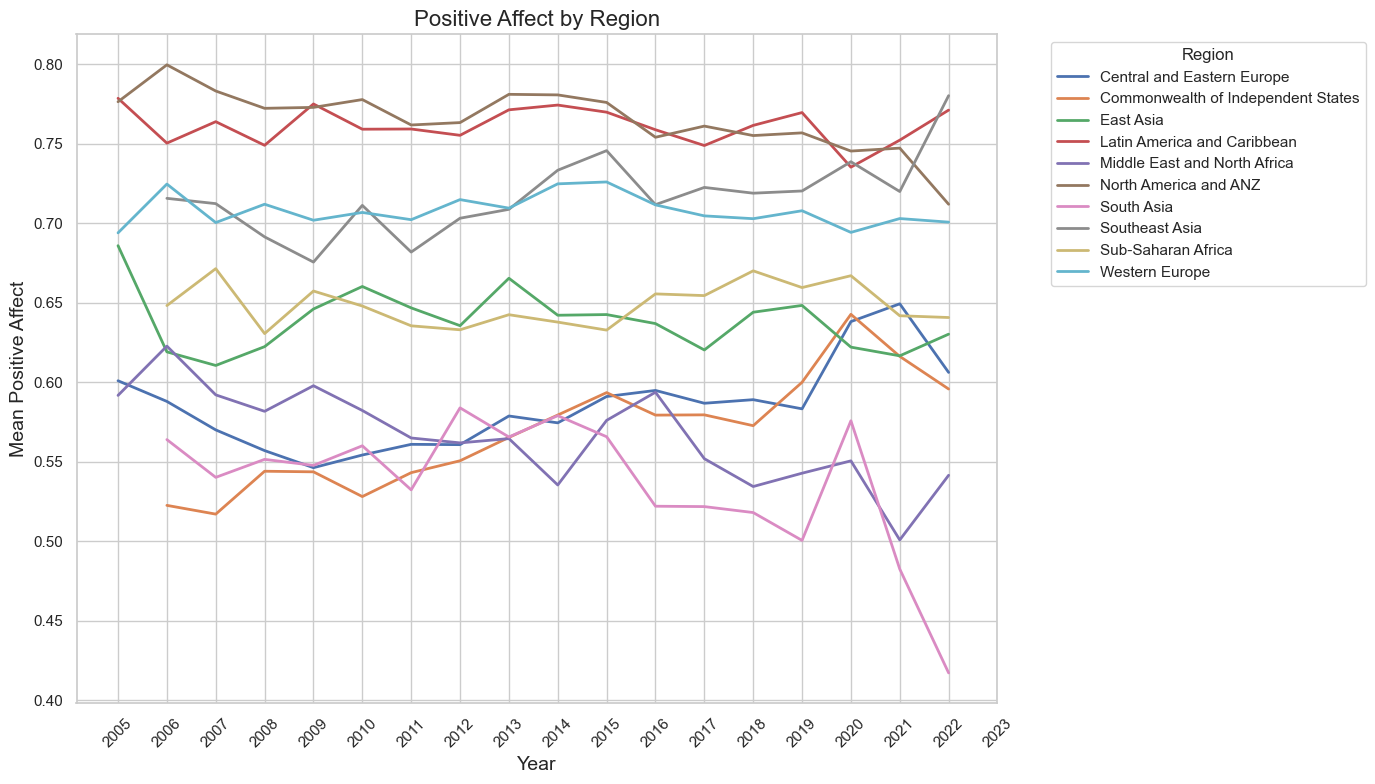

In [135]:
plt.figure(figsize=(14, 8))
for column in region_positive_mean.columns:
    plt.plot(region_positive_mean.index, region_positive_mean[column], marker='', linewidth=2, label=column)

plt.title('Positive Affect by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Positive Affect', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_positive_mean.index.min(), region_positive_mean.index.max()+1, 1), 
           labels=np.arange(region_positive_mean.index.min(), region_positive_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Negative Affect By Region

In [136]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Negative Affect'.
region_negative_mean = happiness.groupby(['Year', 'Regional Indicator'])['Negative Affect'].mean().unstack()

# Life Ladder mean for each Region in each year
region_negative_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,0.294101,NaN,0.153151,0.251245,0.315185,0.235645,0.237266,NaN,NaN,0.228069
2006,0.263685,0.250433,0.209501,0.287375,0.303264,0.239642,0.226641,0.247128,0.240136,0.229877
2007,0.266129,0.231404,0.198660,0.267474,0.336762,0.235459,0.249632,0.217302,0.234367,0.229258
2008,0.256584,0.218897,0.192673,0.265560,0.322677,0.219826,0.229286,0.245599,0.242742,0.203274
2009,0.295847,0.215183,0.187438,0.251888,0.312501,0.254647,0.249585,0.202691,0.190486,0.258009


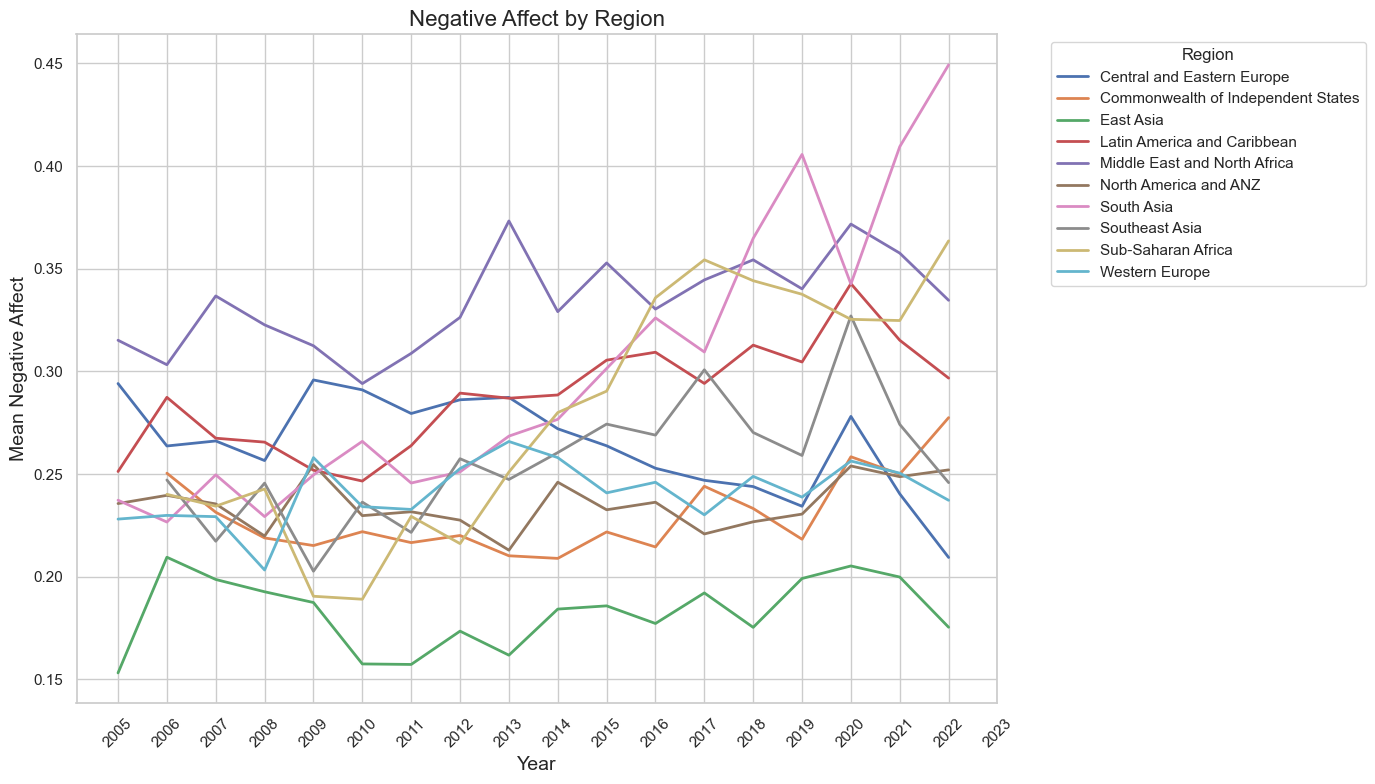

In [137]:
plt.figure(figsize=(14, 8))
for column in region_negative_mean.columns:
    plt.plot(region_negative_mean.index, region_negative_mean[column], marker='', linewidth=2, label=column)

plt.title('Negative Affect by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Negative Affect', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_negative_mean.index.min(), region_negative_mean.index.max()+1, 1), 
           labels=np.arange(region_negative_mean.index.min(), region_negative_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Confidence In National Government By Region

In [103]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Confidence In National Government By Region'.
region_confidence_mean = happiness.groupby(['Year', 'Regional Indicator'])['Confidence In National Government'].mean().unstack()

# Life Ladder mean for each Region in each year
region_confidence_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,0.246273,NaN,0.350331,0.419451,0.677477,0.487440,0.583483,NaN,NaN,0.448576
2006,0.316057,0.545409,0.389429,0.406748,0.514277,0.592255,0.593088,0.768218,0.535484,0.585098
2007,0.324105,0.475075,0.284791,0.387837,0.487458,0.536111,0.609031,0.721461,0.538745,0.477029
2008,0.308070,0.524763,0.396634,0.389933,0.439771,0.519763,0.633475,0.717112,0.499128,0.463636
2009,0.219289,0.518172,0.380319,0.451306,0.550356,0.555656,0.637928,0.782792,0.483291,0.494796


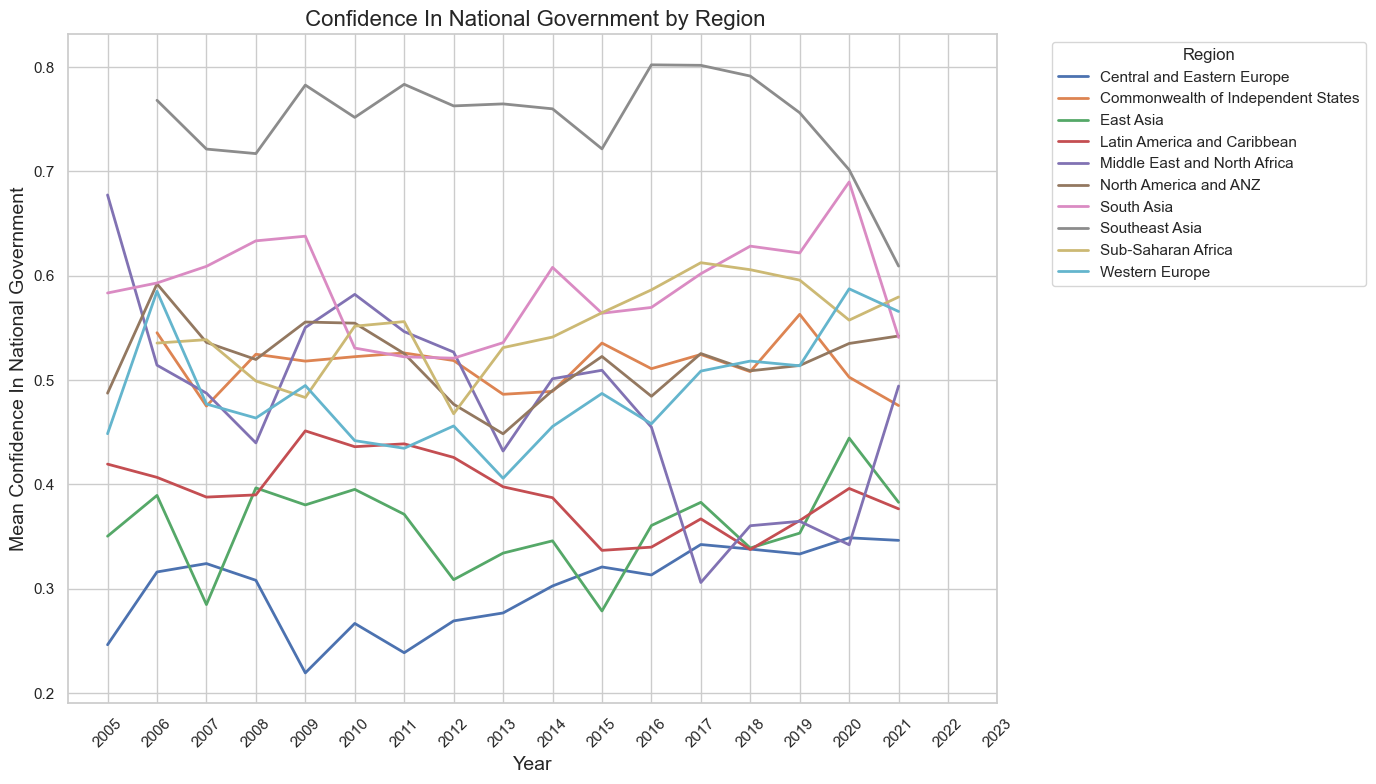

In [104]:
plt.figure(figsize=(14, 8))
for column in region_confidence_mean.columns:
    plt.plot(region_confidence_mean.index, region_confidence_mean[column], marker='', linewidth=2, label=column)

plt.title(' Confidence In National Government by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Confidence In National Government', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(region_confidence_mean.index.min(), region_confidence_mean.index.max()+1, 1), 
           labels=np.arange(region_confidence_mean.index.min(), region_confidence_mean.index.max()+1, 1).astype(int), 
           rotation=45)
plt.tight_layout()
plt.show()

# Calculating Correlation

In [109]:
# Select only numeric columns for calculating correlation
numeric_happiness = happiness.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns ONLY
correlation_matrix = numeric_happiness.corr()

#### Life Ladder Correlations:

In [111]:
life_ladder_correlations = correlation_matrix['Life Ladder'].sort_values(ascending=False)

print(life_ladder_correlations)

Life Ladder                          1.000000
Log GDP Per Capita                   0.784850
Social Support                       0.728171
Healthy Life Expectancy At Birth     0.714106
Freedom To Make Life Choices         0.539667
Positive Affect                      0.518207
Generosity                           0.174507
Year                                 0.045789
Confidence In National Government   -0.081887
Negative Affect                     -0.339992
Perceptions Of Corruption           -0.434104
Name: Life Ladder, dtype: float64


#### Log GDP Per Capita Correlations:

In [116]:
gdp_correlations = correlation_matrix['Log GDP Per Capita'].sort_values(ascending=False)

print(gdp_correlations)

Log GDP Per Capita                   1.000000
Healthy Life Expectancy At Birth     0.817510
Life Ladder                          0.784850
Social Support                       0.686641
Freedom To Make Life Choices         0.371160
Positive Affect                      0.237986
Year                                 0.073501
Generosity                          -0.008925
Confidence In National Government   -0.188351
Negative Affect                     -0.247560
Perceptions Of Corruption           -0.358266
Name: Log GDP Per Capita, dtype: float64


#### Social Support Correlations:

In [117]:
social_correlations = correlation_matrix['Social Support'].sort_values(ascending=False)

print(social_correlations)

Social Support                       1.000000
Life Ladder                          0.728171
Log GDP Per Capita                   0.686641
Healthy Life Expectancy At Birth     0.601054
Positive Affect                      0.431139
Freedom To Make Life Choices         0.412813
Generosity                           0.065939
Year                                -0.035476
Confidence In National Government   -0.169573
Perceptions Of Corruption           -0.224953
Negative Affect                     -0.441800
Name: Social Support, dtype: float64


#### Healthy Life Expectancy At Birth Correlations:

In [118]:
life_expectancy_correlations = correlation_matrix['Healthy Life Expectancy At Birth'].sort_values(ascending=False)

print(life_expectancy_correlations)

Healthy Life Expectancy At Birth     1.000000
Log GDP Per Capita                   0.817510
Life Ladder                          0.714106
Social Support                       0.601054
Freedom To Make Life Choices         0.377589
Positive Affect                      0.223119
Year                                 0.169362
Generosity                           0.006522
Negative Affect                     -0.140726
Confidence In National Government   -0.178003
Perceptions Of Corruption           -0.305198
Name: Healthy Life Expectancy At Birth, dtype: float64


#### Freedom To Make Life Choices Correlations:

In [119]:
freedom_correlations = correlation_matrix['Freedom To Make Life Choices'].sort_values(ascending=False)

print(freedom_correlations)

Freedom To Make Life Choices         1.000000
Positive Affect                      0.578752
Life Ladder                          0.539667
Social Support                       0.412813
Confidence In National Government    0.408533
Healthy Life Expectancy At Birth     0.377589
Log GDP Per Capita                   0.371160
Generosity                           0.319620
Year                                 0.236284
Negative Affect                     -0.275470
Perceptions Of Corruption           -0.472306
Name: Freedom To Make Life Choices, dtype: float64


#### Generosity Correlations:

In [120]:
generosity_correlations = correlation_matrix['Generosity'].sort_values(ascending=False)

print(generosity_correlations)

Generosity                           1.000000
Freedom To Make Life Choices         0.319620
Positive Affect                      0.307140
Confidence In National Government    0.294399
Life Ladder                          0.174507
Social Support                       0.065939
Year                                 0.019075
Healthy Life Expectancy At Birth     0.006522
Log GDP Per Capita                  -0.008925
Negative Affect                     -0.080837
Perceptions Of Corruption           -0.271760
Name: Generosity, dtype: float64


#### Perceptions Of Corruption Correlations:

In [121]:
corruption_correlations = correlation_matrix['Perceptions Of Corruption'].sort_values(ascending=False)

print(corruption_correlations)

Perceptions Of Corruption            1.000000
Negative Affect                      0.266267
Year                                -0.082510
Social Support                      -0.224953
Generosity                          -0.271760
Positive Affect                     -0.280620
Healthy Life Expectancy At Birth    -0.305198
Log GDP Per Capita                  -0.358266
Life Ladder                         -0.434104
Confidence In National Government   -0.460789
Freedom To Make Life Choices        -0.472306
Name: Perceptions Of Corruption, dtype: float64


#### Positive Affect Correlations:

In [139]:
positive_correlations = correlation_matrix['Positive Affect'].sort_values(ascending=False)

print(positive_correlations)

Positive Affect                      1.000000
Freedom To Make Life Choices         0.578752
Life Ladder                          0.518207
Social Support                       0.431139
Generosity                           0.307140
Log GDP Per Capita                   0.237986
Healthy Life Expectancy At Birth     0.223119
Confidence In National Government    0.123241
Year                                 0.019182
Perceptions Of Corruption           -0.280620
Negative Affect                     -0.330236
Name: Positive Affect, dtype: float64


#### Negative Affect Correlations:

In [140]:
negative_correlations = correlation_matrix['Negative Affect'].sort_values(ascending=False)

print(negative_correlations)

Negative Affect                      1.000000
Perceptions Of Corruption            0.266267
Year                                 0.205369
Generosity                          -0.080837
Confidence In National Government   -0.125631
Healthy Life Expectancy At Birth    -0.140726
Log GDP Per Capita                  -0.247560
Freedom To Make Life Choices        -0.275470
Positive Affect                     -0.330236
Life Ladder                         -0.339992
Social Support                      -0.441800
Name: Negative Affect, dtype: float64


#### Confidence In National Government Correlations:

In [142]:
confidence_correlations = correlation_matrix['Confidence In National Government'].sort_values(ascending=False)

print(confidence_correlations)

Confidence In National Government    1.000000
Freedom To Make Life Choices         0.408533
Generosity                           0.294399
Positive Affect                      0.123241
Year                                 0.012638
Life Ladder                         -0.081887
Negative Affect                     -0.125631
Social Support                      -0.169573
Healthy Life Expectancy At Birth    -0.178003
Log GDP Per Capita                  -0.188351
Perceptions Of Corruption           -0.460789
Name: Confidence In National Government, dtype: float64


# Correlation: Heatmap

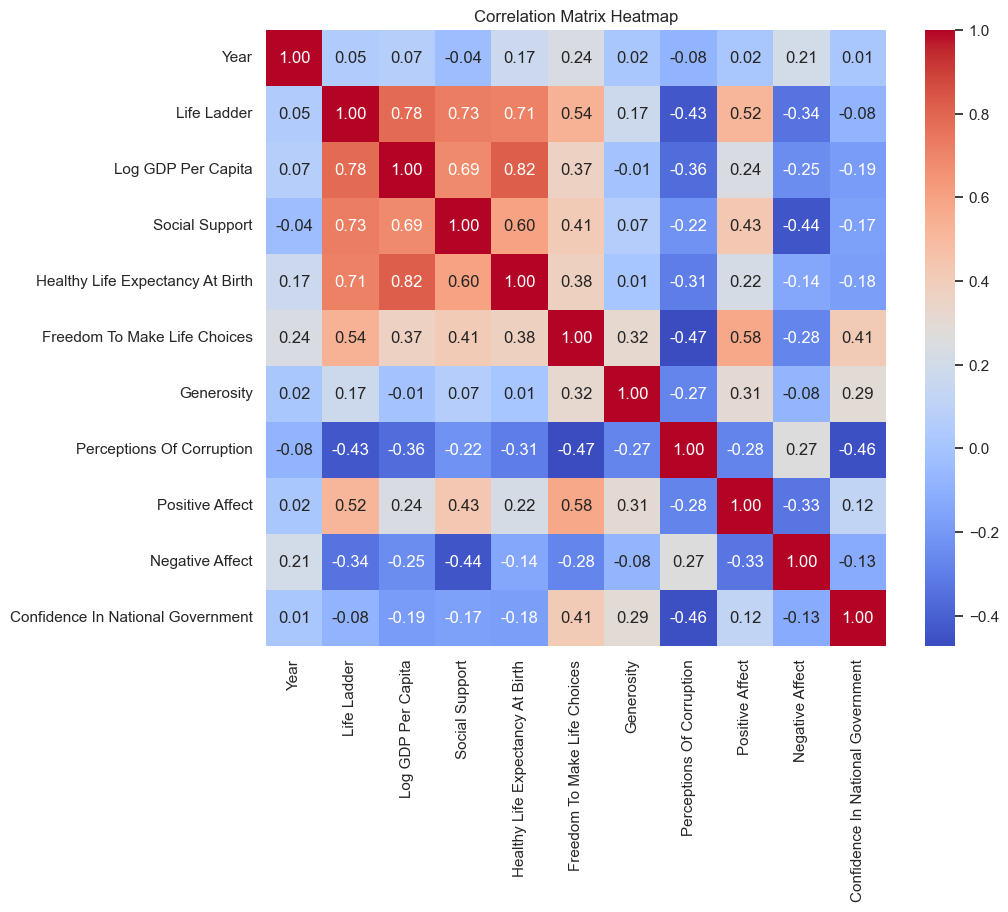

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Prep

In [190]:
from prophet import Prophet
happiness['ds'] = pd.to_datetime(happiness['Year'], format='%Y')

In [191]:
regions = happiness['Regional Indicator'].unique()

23:56:16 - cmdstanpy - INFO - Chain [1] start processing
23:56:16 - cmdstanpy - INFO - Chain [1] done processing


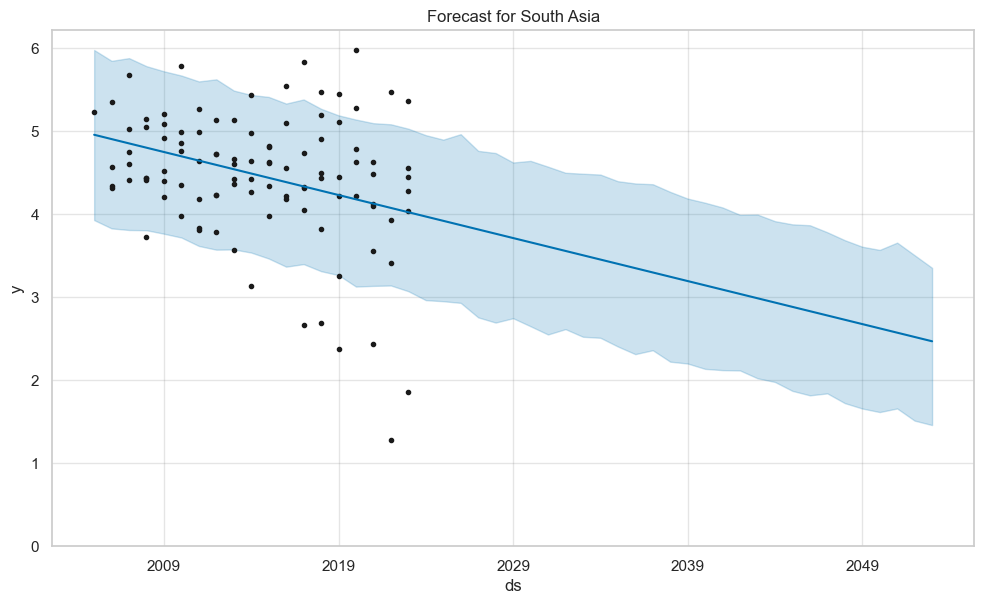

23:56:17 - cmdstanpy - INFO - Chain [1] start processing
23:56:17 - cmdstanpy - INFO - Chain [1] done processing


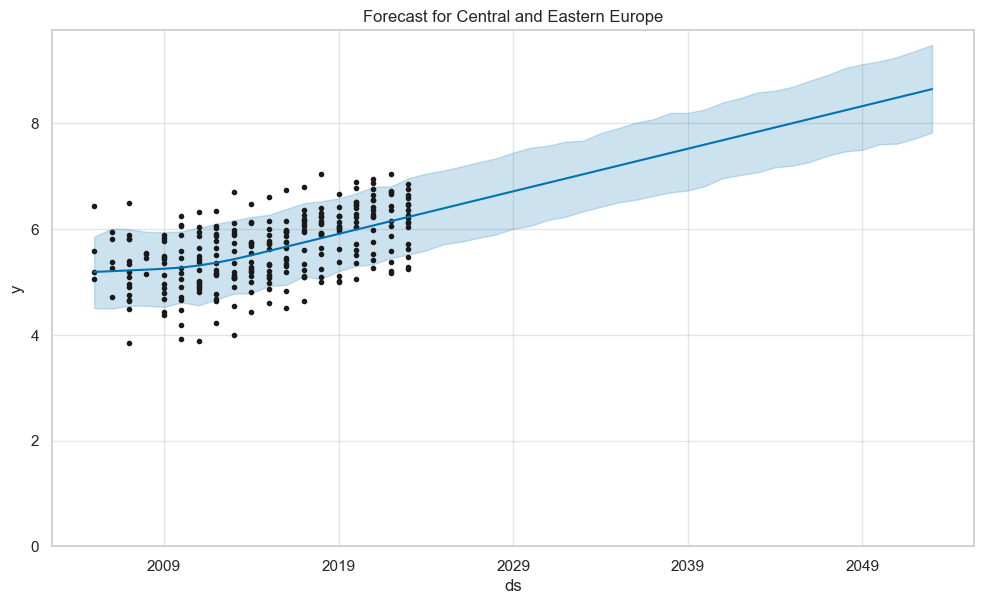

23:56:18 - cmdstanpy - INFO - Chain [1] start processing
23:56:18 - cmdstanpy - INFO - Chain [1] done processing


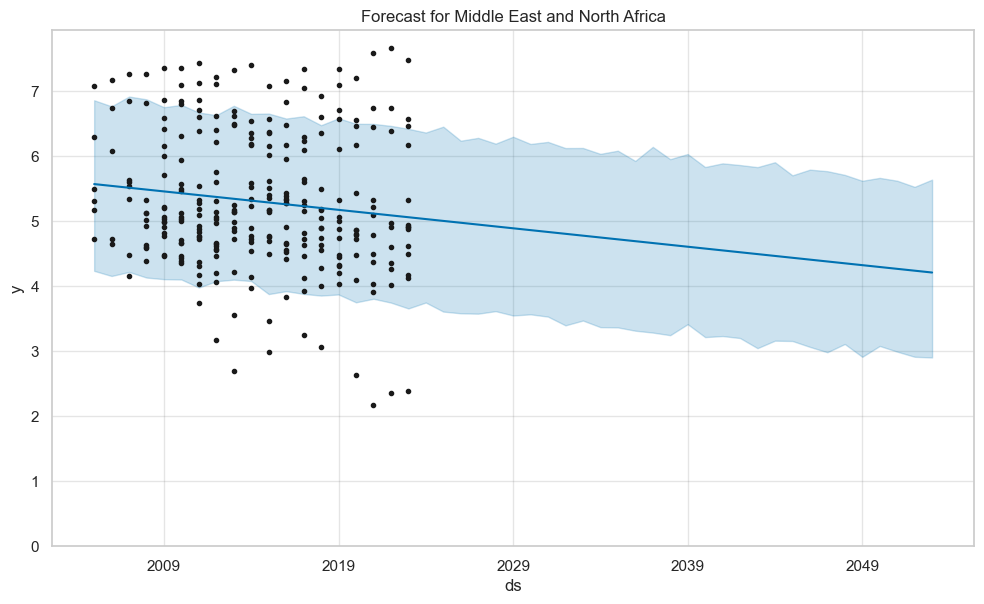

23:56:19 - cmdstanpy - INFO - Chain [1] start processing
23:56:19 - cmdstanpy - INFO - Chain [1] done processing


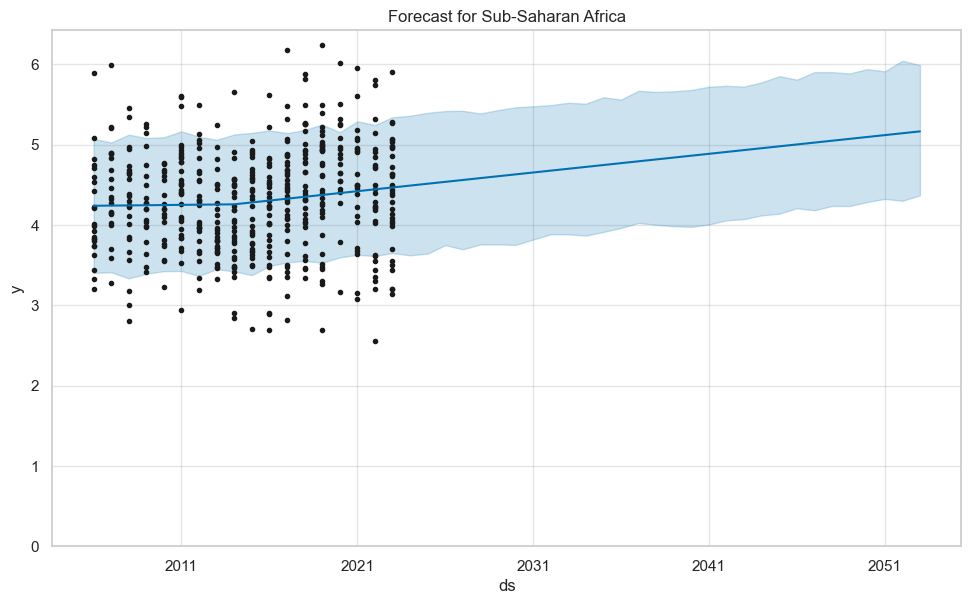

23:56:20 - cmdstanpy - INFO - Chain [1] start processing
23:56:20 - cmdstanpy - INFO - Chain [1] done processing


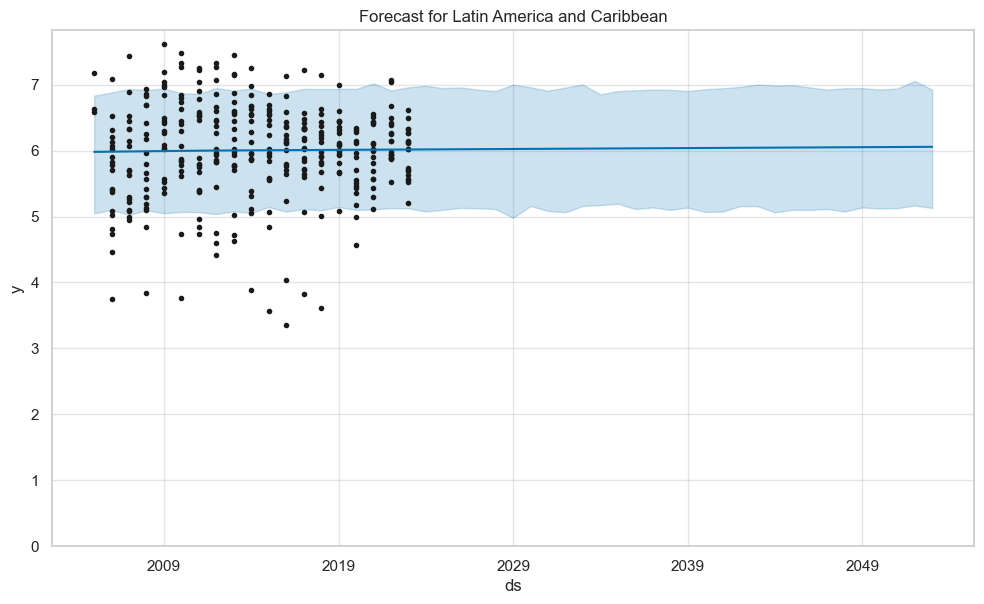

23:56:21 - cmdstanpy - INFO - Chain [1] start processing
23:56:21 - cmdstanpy - INFO - Chain [1] done processing


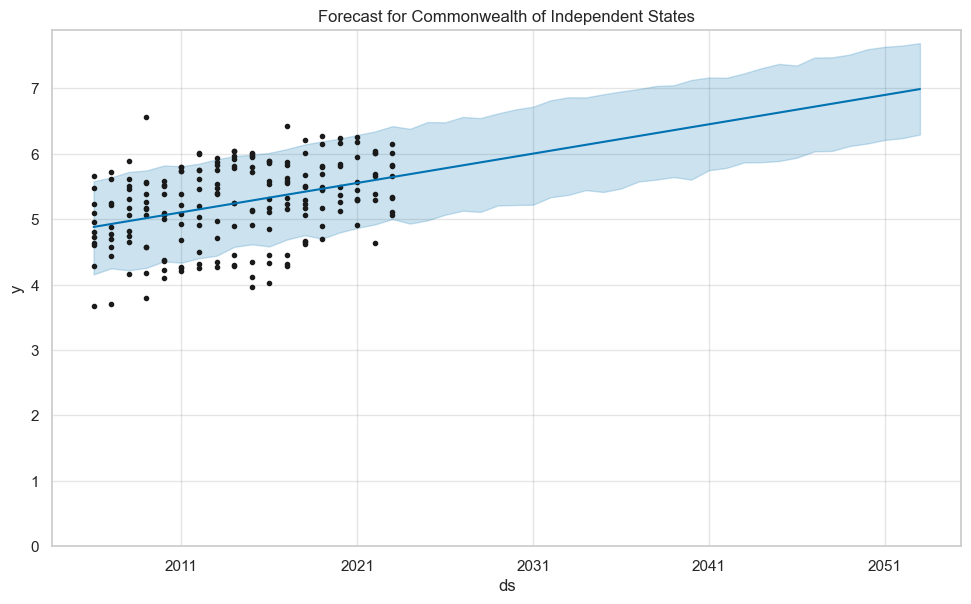

23:56:22 - cmdstanpy - INFO - Chain [1] start processing
23:56:23 - cmdstanpy - INFO - Chain [1] done processing


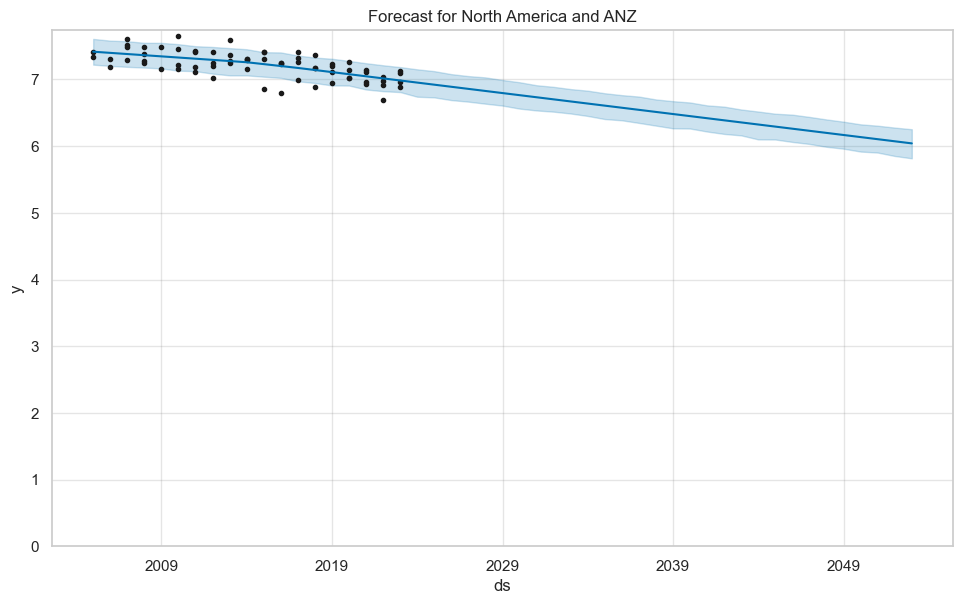

23:56:23 - cmdstanpy - INFO - Chain [1] start processing
23:56:24 - cmdstanpy - INFO - Chain [1] done processing


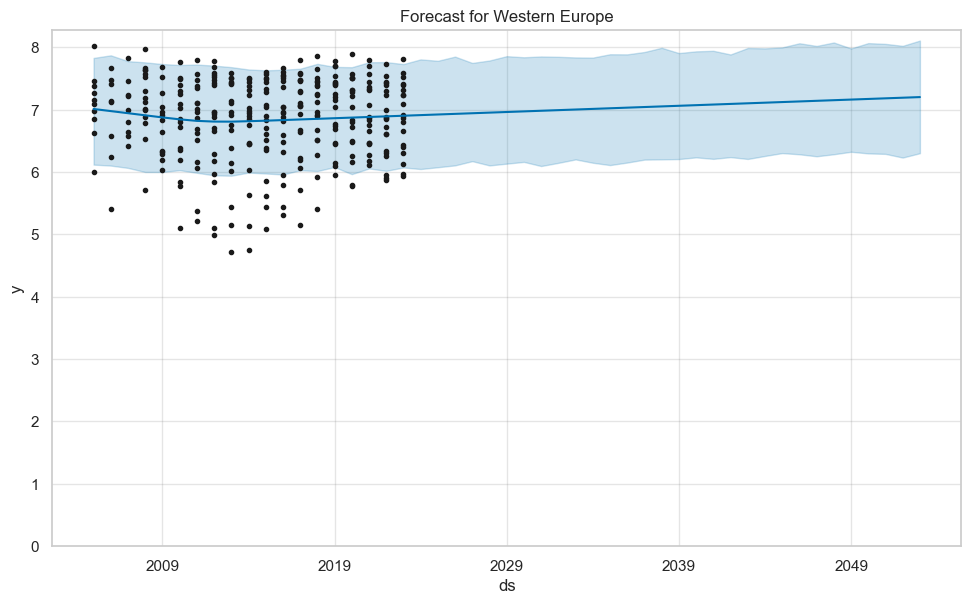

23:56:24 - cmdstanpy - INFO - Chain [1] start processing
23:56:25 - cmdstanpy - INFO - Chain [1] done processing


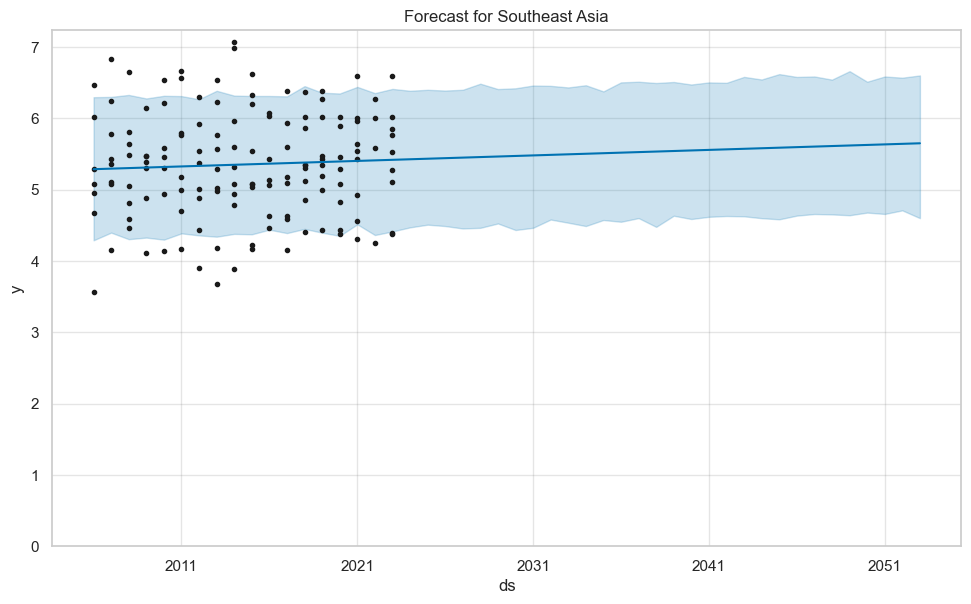

23:56:25 - cmdstanpy - INFO - Chain [1] start processing
23:56:26 - cmdstanpy - INFO - Chain [1] done processing


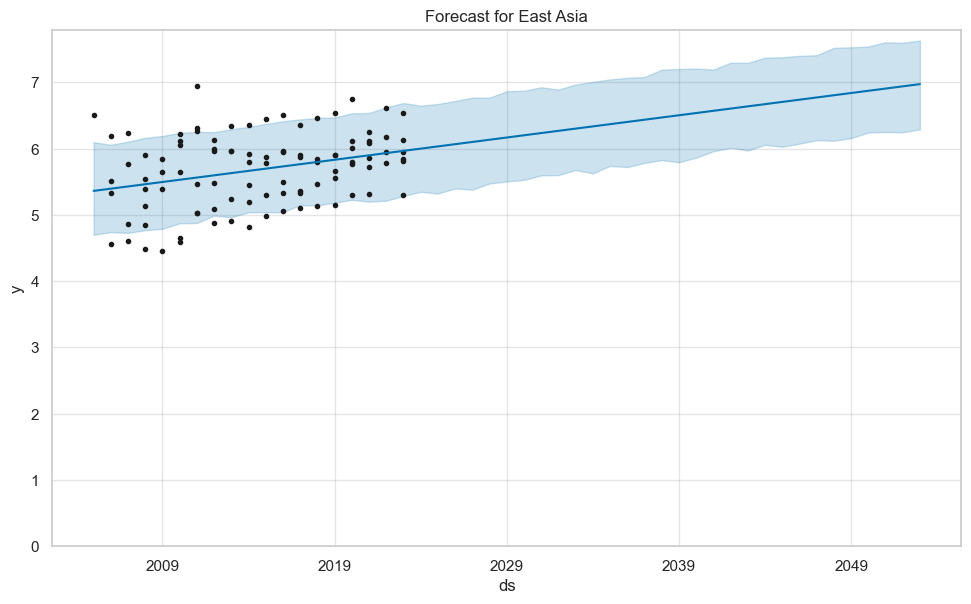

In [193]:
for region in regions:
    df_region = happiness[happiness['Regional Indicator'] == region][['ds', 'Life Ladder']].rename(columns={'Life Ladder': 'y'})
    
    if not df_region.empty:
        model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
#         
        model.fit(df_region)
        future = model.make_future_dataframe(periods=30, freq='Y')
        
        forecast = model.predict(future)
        fig = model.plot(forecast)
        plt.title(f"Forecast for {region}")
#       This sets our y-axis starting point at 0
        ax = fig.gca()
        ax.set_ylim(bottom=0)
        
        plt.show()